## Let's play Fill or Bust! ##

In [1]:
import fillOrBust
reload(fillOrBust)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
player = fillOrBust.Turn()
bust_count, fill_count, stop_count = 0,0,0

n_turns = 1000
scores = np.zeros((n_turns,1))
for n in np.arange(n_turns):
    while player._dice_remaining > 0 and not player._stopped:            

        # Implement some strategy
        if player._dice_remaining <= 2:
            player.stop()
            break        

        player.roll()

    if np.mod(n,np.round(0.2*n_turns))==0: print("{0}/{1}".format(n,n_turns))
    scores[n,0] = player.score

    if player._bust:
        bust_count += 1
    if player._fill:
        fill_count += 1
    if player._stopped:
        stop_count += 1

    player.__restart__()

print("\nAfter {N} turns, the average score was: {avg_score}.".format(N=n_turns,avg_score=scores.mean()))
print("You busted {n_busts} times, got {n_fills} fills, and stopped {n_stops} times.".format(n_busts=bust_count,n_fills=fill_count,n_stops=stop_count))


0/1000
200/1000
400/1000
600/1000
800/1000

After 1000 turns, the average score was: 421.25.
You busted 118 times, got 79 fills, and stopped 803 times.


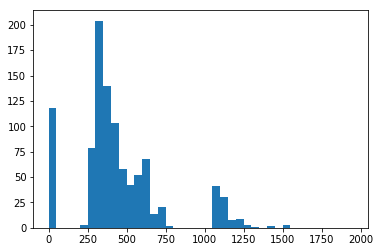

In [4]:
plt.hist(scores,bins=np.arange(0,2000,50))
plt.show()